<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Christopherlopmx/blob/main/IBM_Semana_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ahora vamos a ver evaluación de modelos y refinamiento  :)


Los objetivos son:

Evaluacion de modelos
Overfitting y underfitting
Ridge Regression
Grid Search

Vamos a responder la pregunta, ¿cómo sabes que el modelo va a funcionar en el mundo real?

In [ ]:
# Evaluación de modelo

#Esto nos dirá si el modelo es bueno o no para predecir en la vida real.

#Lo que se hace es que spliteas el modelo para realizar predicciones y luego para comprar.

#O sea, partes la data en 70% para entrenamiento y 30% para evaluación

#Se usa la librearía sklearn, train_Test

In [6]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual # esta es para hacer graficas

In [7]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [12]:
#Estas funciones que siguen son para poder hacer las graficas de distribución normal después:

In [13]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [14]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [17]:
#Entonces, para ver si el modelo esta bien, vamos a separar los datos en pedazos, un pedazo va a ser para modelar, el otro para comparar, lo vamos a hacer
#varias veces para luego calcular los r2 promedios y ver si esta bien o no el modelo.

#en el lab creamos un df separado en y_data

In [18]:
y_data = df['price']

In [20]:
#y en este quitamos el precio de los datos de x, proque el precio es la variable dependiente.

In [21]:
x_data=df.drop('price',axis=1)

In [22]:
#Ahora vamos a separar los datos de forma aleatoria, usando sklearn

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

#Aquí vamos a imprimir el número de datos para pruebas y para entrenamientos

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [24]:
#Arruba el test size, o las pruebas es 10% de todos los datos test_size=10, vamos a ver como se ve con 40%

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)  #en el lab pasan el random_State=0 pero no dicen porque, investigalo!
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [26]:
from sklearn.linear_model import LinearRegression  #vamos a ahora a hacer regresiones lineales

In [27]:
lre=LinearRegression() #el objeto regresión


In [28]:
lre.fit(x_train[['horsepower']], y_train) #hacemos fit de la regresión al modelo

LinearRegression()

In [29]:
lre.score(x_test[['horsepower']], y_test) #calculamos el r2 score para el test

0.36358755750788263

In [30]:
lre.score(x_train[['horsepower']], y_train) #y vamos a ver el r2 score para los datos de entrenamiento

0.6619724197515104

In [ ]:
#el r2 score es mucho más pequeño con el test que con el train

In [ ]:
#vamos a regresar al ejemplo del 40%

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [ ]:
#Interesante, acá el r2 score para el test data es 71%

#lo que parece que esta pasando es que no hay suficientes datos, entonces tenemos que hacer cross validation

In [32]:
from sklearn.model_selection import cross_val_score #esto se importa para cross validation

In [34]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) #ok, vamos a hacerlo sobre la x_data y cv=4 dice que van a ser 4 "folds" (folds son el numero de veces que separas todo esto y luego vas probando cada uno)

In [36]:
Rcross  #este es el r2 score del cross validation de cada fold, como son 4 van a ser 4 r2 score

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [37]:
#Con esto podemos calcular desviación y estandar y promedio de la cross validation

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [38]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error') #esto no entedí que es jaja, pero se puede hacer luego del cross validation, invetigar!

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
#Todo muy interante y así, pero ¿cómo sabes cuál tipo de ecuación seleccionar?

#overfitting es cuando seleccionas un modelo que predice bien las observaciones, pero no explica el modelo completo

#underfitting es cuando seleccionas un modelo que no predice practicamente para nada el modelo ni lo explica.

#Para seleccionar correctamente el número de polinonios que debe llevar la ecuación, pudes determinar r2 (Será optima mientras más se acerque a 1)

#y también puedes validar el mse por el número de polinomios de la data de prueba y entrenamiento. Cuando el mse por polinomio de prueba sea menor, antes de aumentar, es el polinimio adecuado.

In [39]:
#Praa probar vamos a hacer una regresion lineal

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
#Prediccion con data de entrenamiento

In [40]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
#Prediccion con data de prueba

In [41]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [ ]:
#Vamos a graficar la distribución normal de los valores predecids vs los valores de pruebas

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


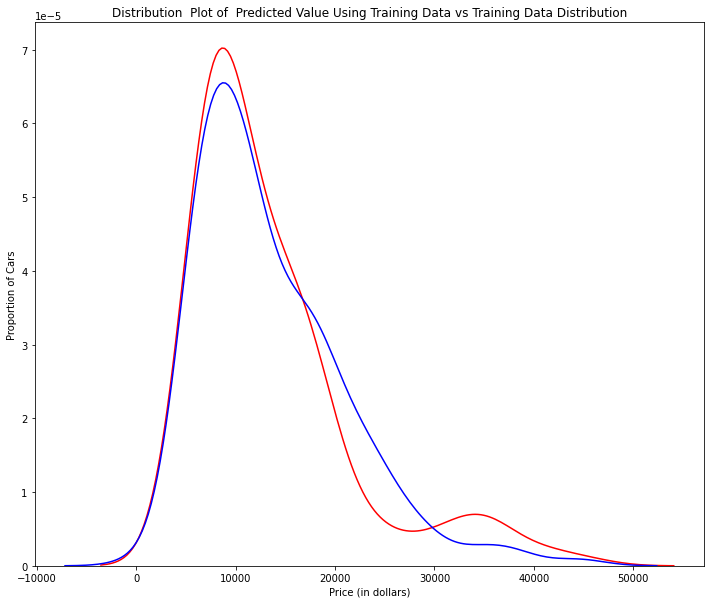

In [43]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
#fijate com después de los 2000 usd de precios como que ya no hacen tan bien auqnue con los datos de pruebas del modelo se ve bastante bien en general

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


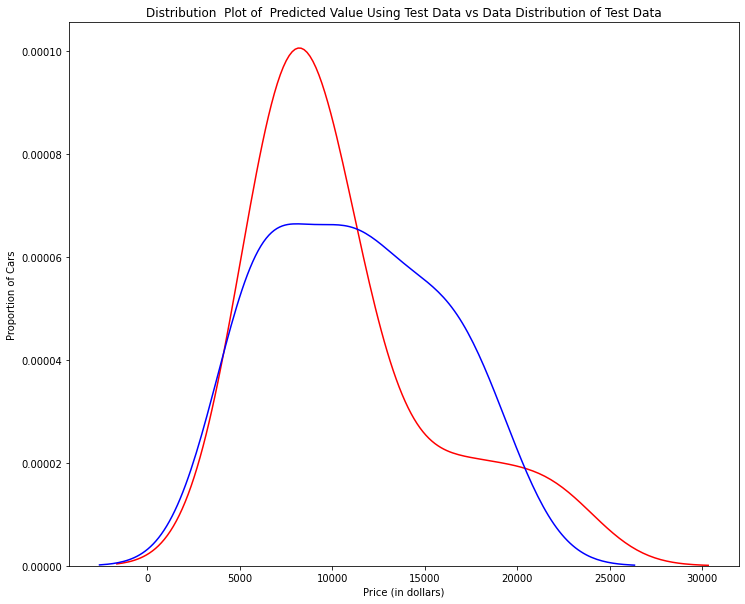

In [44]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#Pero cuando ponemos información para las pruebas del mismo data set, todo se descompone, el modelo no sigue tan bien a los datos

In [ ]:
#Veamos un ejemplo de overfitting

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [47]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [48]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [49]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [50]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


In [51]:
#Usamos un polinomio de 5 y cuando se termina la prueba, fijate como los datos si estan medio separados.

In [53]:
#mira como se ve la gráfica de esto

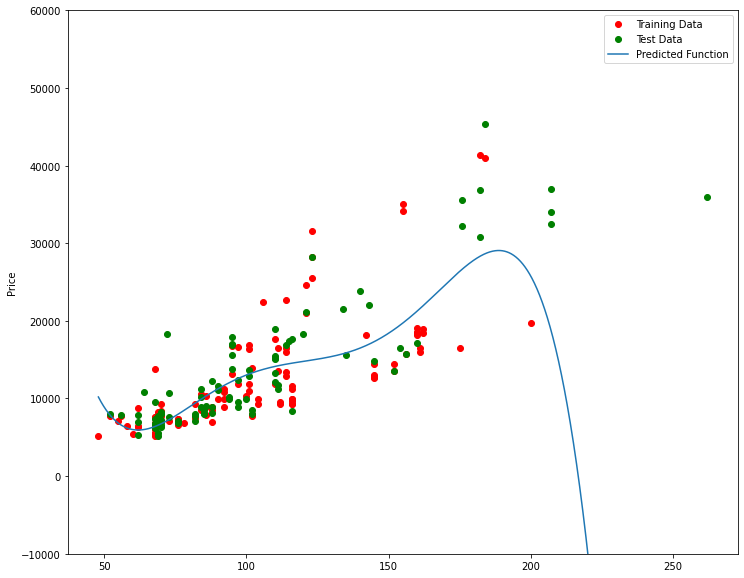

In [54]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [ ]:
#Todo bien hasta llegar a los 2000 de precio, luego cae con fuerza! 

In [55]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [56]:
poly.score(x_test_pr, y_test)

-29.87134030204415

In [ ]:
#lor r2 son cerca de 0, o sea no esta tan bien fitted

Text(3, 0.75, 'Maximum R^2 ')

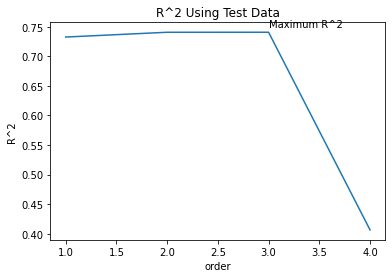

In [57]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [ ]:
#En la parte de arriba esatmos ploteando el r2 de varios polinomios, fijate como r2 va cada ves más alto hasta llevar a 3, luego baja.
#el # de polinimos optimo es entonces 3, recuerda que queires un r2 lo más cerca de 1

In [ ]:
#Esta parte de aquí esta super divertida, es una gráfica interactiva!!! Puedes ir poniendo el orden de los polinios y el % de test data para ver
#como se ve el modelo del entrenamiento vs las pruebas.

In [58]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [59]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [60]:
#Ahora vamos a ver otros tipos de revisión y vamos a practicar otros "fitting" para validar los modelos

In [61]:
#ridge regresion es para introducir otro elemento de analisis en todo esto del fitting. Basicamente incluynes
# un nuevo elemento que se llama alpha que "suavia?" la regresion, en caso de que tengas puntos fuera de las estrucutras normales de
#las observaciones.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [62]:
from sklearn.linear_model import Ridge

In [ ]:
#estamos poniendo aquí que es un alpha = 1

In [63]:
RigeModel=Ridge(alpha=1)

In [64]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [65]:
yhat = RigeModel.predict(x_test_pr)

In [ ]:
#el set de preducciones y de pruebas

In [66]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [ ]:
#esto es para calcular todos los r2 y después podemos hacerlos una gráfica para anlizarlos

In [67]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 119.23it/s, Test Score=0.564, Train Score=0.859]


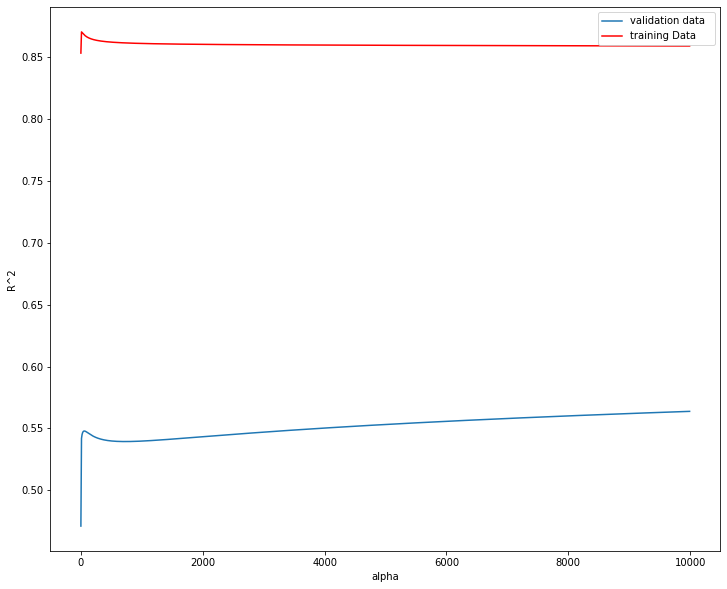

In [68]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [69]:
#grid search sirve para encontrar los mejores hiperparametros

from sklearn.model_selection import GridSearchCV

In [70]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [71]:
RR=Ridge()
RR

Ridge()

In [72]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [73]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [74]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [75]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [ ]:
#y aquí puedes ver que el r esta bien cerquita de 1, entonces lo mejor es 1000 como alpha .. :v